In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Definir la función que describe la ecuación diferencial
def f(t, z, v, k, w, k_ext):
    return v, (k_ext / z**2) - w**2 * z

# Implementar el método de Runge-Kutta de cuarto orden
def runge_kutta4(t0, z0, v0, k, w, k_ext, h, num_steps):
    z_values = np.zeros(num_steps)
    v_values = np.zeros(num_steps)
    t_values = np.zeros(num_steps)
    
    z_values[0] = z0
    v_values[0] = v0
    t_values[0] = t0
    
    for i in range(1, num_steps):
        t = t_values[i - 1]
        z = z_values[i - 1]
        v = v_values[i - 1]
        
        k1_z, k1_v = f(t, z, v, k, w, k_ext)
        k2_z, k2_v = f(t + h/2, z + h/2 * k1_z, v + h/2 * k1_v, k, w, k_ext)
        k3_z, k3_v = f(t + h/2, z + h/2 * k2_z, v + h/2 * k2_v, k, w, k_ext)
        k4_z, k4_v = f(t + h, z + h * k3_z, v + h * k3_v, k, w, k_ext)
        
        z_values[i] = z + h/6 * (k1_z + 2*k2_z + 2*k3_z + k4_z)
        v_values[i] = v + h/6 * (k1_v + 2*k2_v + 2*k3_v + k4_v)
        t_values[i] = t + h
    
    return t_values, z_values, v_values

In [40]:

# Parámetros
k = 3  # Constante de resorte
m = 4.0 #masa 
w = np.sqrt(k/m)  # Frecuencia angular natural
k_ext = 2/(4*m*np.pi*8.854e-12)  # Fuerza externa
h = 0.01  # Paso de tiempo
t_max = 100.0  # Tiempo máximo de simulación
num_steps = int(t_max / h)

# Condiciones iniciales
z0 = 1.0
v0 = 0.0
t0 = 0.0

# Resolver la ecuación diferencial usando Runge-Kutta de cuarto orden
t_values, z_values, v_values = runge_kutta4(t0, z0, v0, k, w, k_ext, h, num_steps)

# Calcular la transformada de Fourier
t_step = t_values[1] - t_values[0]
yf = fft(z_values)
xf = fftfreq(len(t_values), t_step)[:len(t_values)//2]

# Encontrar la frecuencia dominante
dominant_freq_index = np.argmax(np.abs(yf[:len(t_values)//2]))
dominant_freq = xf[dominant_freq_index]

print("Frecuencia dominante:", dominant_freq)

Frecuencia dominante: 0.14


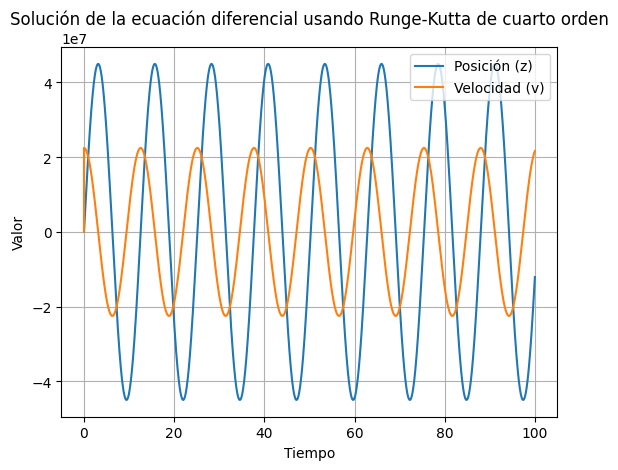

In [30]:
# Graficar resultados
plt.plot(t_values, z_values, label='Posición (z)')
plt.plot(t_values, v_values, label='Velocidad (v)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Solución de la ecuación diferencial usando Runge-Kutta de cuarto orden')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Encontrar los puntos máximos de la función z(t)
def find_peaks(t_values, z_values):
    peaks = []
    for i in range(1, len(z_values) - 1):
        if z_values[i] > z_values[i - 1] and z_values[i] > z_values[i + 1]:
            peaks.append((t_values[i], z_values[i]))
    return peaks

# Usar la función find_peaks para encontrar los puntos máximos
peaks = find_peaks(t_values, z_values)
print("Puntos máximos de la función z(t):", peaks)


Puntos máximos de la función z(t): [(3.139999999999977, 44938451.060503185), (15.70999999999971, 44938578.54843831)]
